# Web Shop Manager Competitor Analysis 

### In this project, web pages of companies competing with Web Shop Manager will be examined. It is aimed to perform SEO analysis by examining the titles and keywords in the content of the posts on the web pages.

In [72]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [142]:
# labs
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import seaborn as sns

## Competitors:

### 1: PartsTech: Automotive E-Commerce Technology "https://www.partstech.com/home"
### 2: BigCommerce: "https://www.bigcommerce.com/solutions/automotive/"
### 3: nopCommerce: "https://www.nopcommerce.com/en/solutions/automotive-ecommerce"
### 4: BitBag: "https://bitbag.io/blog/category/ecommerce"
### 5: Miva: "https://blog.miva.com/search-results?term=automotive&type=BLOG_POST&type=LISTING_PAGE"
### 6: PartsSquare: "https://square.parts/"
### 7: Auto Parts Shopping Cart: "https://www.autopartsshoppingcart.com/autopartsshoppingcartpackages.html"
### 8: Complete web solutions: "https://www.completewebsol.com/"
### 9: Sophio: "https://www.sophio.com/"
### 10: OROCommerce: "https://oroinc.com/b2b-ecommerce/automotive-and-auto-parts/"

##  Extracting headers as data with web scraping

In [29]:
#This function pulls and categorizes all h1, h2 and h3 headings on the website and saves them in a database called "data". 
#This database is saved as a CSV file and is also returned by the function.

def scrape_headers(url):
    # Let's pull the website by request
    response = requests.get(url)

    # Let's process the HTML code of the page with the BeautifulSoup library
    soup = BeautifulSoup(response.content, 'html.parser')

    # Let's get the h1, h2 and h3 tags
    headers = soup.find_all(['h1', 'h2', 'h3'])

    # Let's create a dictionary to store titles
    data = {'h1': [], 'h2': [], 'h3': [], 'company': []}

    # Let's process for each header and add the data to the dictionary
    for header in headers:
        text = header.get_text().strip()
        if header.name == 'h1':
            data['h1'].append(text)
        elif header.name == 'h2':
            data['h2'].append(text)
        elif header.name == 'h3':
            data['h3'].append(text)

    # Let's get the company name
    company_name = url.split('.')[1]

    # Let's add the company name to the dictionary
    num_headers = max(len(data['h1']), len(data['h2']), len(data['h3']))
    data['company'] = [company_name] * num_headers

    # Let's make sure each dictionary key has the same number of values
    for key in data.keys():
        data[key] += [''] * (num_headers - len(data[key]))

    # Let's convert it to Pandas DataFrame
    df = pd.DataFrame(data)

    # Let's save the database as a CSV file
    if os.path.exists('data.csv'):
        df.to_csv('data.csv', mode='a', index=False, header=False)
    else:
        df.to_csv('data.csv', index=False)

    return df

In [7]:
#We created our function. To the function "?" instead of the web address we entered, 
#the h1, h2 and h3 headers and company name will be stored in the "data.csv" file.
# scrape_headers('?')

## Detecting keywords with web scraping method

In [94]:
def find_key_words(url):
    # Sending a request to a web page
    try:
        response = requests.get(url)
    except:
        print("Invalid URL!")
        return

    # Taking HTML codes and converting them to text
    html_text = response.text

    # Remove tags and other items
    cleaned_text = re.sub('<[^<]+?>', '', html_text)

    # Separating words
    words = re.findall(r'\b\w+\b', cleaned_text.lower())

    # Removing stop words and short words
    stopwords_list = stopwords.words('english') + ['Coordinating Conjunctions', 'Subordinating Conjunctions', 'Correlative Conjunctions']
    words = [word for word in words if word not in stopwords_list and len(word) > 2 and "_" not in word]

    # Calculating word counts
    word_count = {}
    for word in words:
        if word.isdigit():
            continue
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

    # Finding keywords with frequency of 2 or more
    key_words = []
    for key in word_count:
        if word_count[key] >= 2:
            key_words.append([key, word_count[key]])

    # Saving to CSV file
    if len(key_words) > 0:
        with open('key_words.csv', mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['word', 'frequency'])
            for key_word in key_words:
                writer.writerow([key_word[0], key_word[1]])

    print("Done.")

In [10]:
#To use the function you just have to give the URL as a parameter and then call the function:
#find_key_words("?")

# Web scraping process

## Extracting headers

In [155]:
url_list = ["https://www.partstech.com/blog", "https://www.partstech.com/blog/page/2", "https://www.bigcommerce.com/solutions/automotive/", "https://www.bigcommerce.com/articles/ecommerce/selling-auto-parts-online/", "https://www.bigcommerce.com/resources/guides/ecommerce-pain-points-report/", "https://www.nopcommerce.com/en/solutions/automotive-ecommerce", "https://bitbag.io/industries/ecommerce-for-automotive", "https://bitbag.io/?s=Automotive", "https://blog.miva.com/search-results?term=automotive&type=BLOG_POST&type=LISTING_PAGE", "https://www.miva.com/gp-automotive-ecommerce", "https://square.parts/", "https://www.autopartsshoppingcart.com/autopartsshoppingcartpackages.html", "https://www.completewebsol.com/blog?page=2", "https://www.completewebsol.com/blog?page=1", "https://www.completewebsol.com/blog", "https://www.completewebsol.com/", "https://www.sophio.com/index.asp", "https://oroinc.com/b2b-ecommerce/page/2/?s=Automotive", "https://oroinc.com/b2b-ecommerce/automotive-and-auto-parts/"]

# Create an empty DataFrame
all_headers_df = pd.DataFrame()

# Call scrape_headers for all links and merge the results
for url in url_list:
    headers_df = scrape_headers(url)
    all_headers_df = pd.concat([all_headers_df, headers_df])

# Show results
print(all_headers_df.head())

          h1           h2                                                 h3  \
0  PartsTech  Blog & News  Advanced Business Computers of America, Inc. (...   
1  PartsTech                        PartsTech Now Integrates with Bay-Master   
2                                            June 2022 System Updates & News   
3                          AutoMobile Technologies Partnering with PartsT...   
4                                             May 2022 System Updates & News   

     company  
0  partstech  
1  partstech  
2  partstech  
3  partstech  
4  partstech  


In [61]:
# Define a list of stop words that will be excluded from the word count
stop_words = ['and', 'for', 'to', 'the', 'partstech', 'bigcommerce', 'your', '&', 'is', 'in', 'com/b2b-ecommerce/automotive-and-auto-parts/', 'autopartsshoppingcart', 'on', 'now', 'completewebsol', 'all', 'a']

all_headers_df = pd.read_csv('data.csv')

# Get all words in the headers and count their occurrences
word_counts = Counter()
for header in all_headers_df.values.flatten():
    if isinstance(header, str):
        for word in header.split():
            if word.lower() not in stop_words:
                word_counts[word.lower()] += 1

# Get the 10 most common words
most_common_words = dict(word_counts.most_common(10))

# Convert the dictionary to a pandas dataframe
df = pd.DataFrame({'word': list(most_common_words.keys()), 'count': list(most_common_words.values())})

# Save the dataframe as a csv file
df.to_csv('common_words_in_titles.csv', index=False)

In [62]:
common_words_in_titles = pd.read_csv('common_words_in_titles.csv')
common_words_in_titles

,word,count
0,parts,53
1,ecommerce,41
2,automotive,32
3,auto,26
4,solutions,20
5,news,20
6,system,15
7,updates,14
8,available,14
9,b2b,13


### Let's create a word cloud:

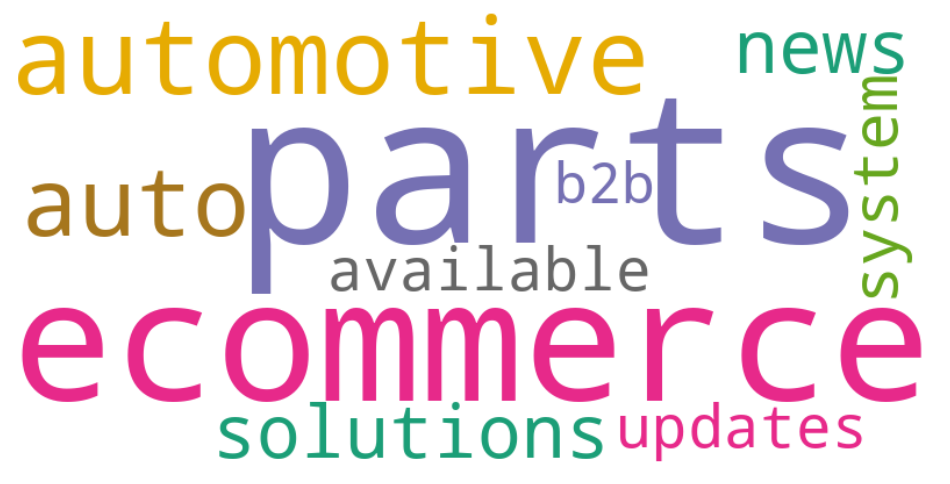

In [67]:
# Create a dictionary with the word counts
word_counts = {'parts': 53, 'ecommerce': 41, 'automotive': 32, 'auto': 26, 'solutions': 20, 'news': 20, 'system': 15, 'updates': 14, 'available': 14, 'b2b': 13}

# Calculate the total number of words
total_words = sum(word_counts.values())

# Calculate the percentage for each word
percentages = {word: count/total_words*100 for word, count in word_counts.items()}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate_from_frequencies(percentages)

# Plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Detecting keywords

## Web-Scrapping

In [100]:
#find_key_words("https://www.partstech.com/blog")
#find_key_words("https://www.partstech.com/blog/june-2022-system-updates--news")
#find_key_words("https://www.partstech.com/blog/amt-now-integrates-with-partstech")
#find_key_words("https://www.partstech.com/blog/in-case-you-missed-it-partstech-on-the-asog-posdcast")
#find_key_words("https://www.partstech.com/blog/integration-update-see-more-inventory-from-napa-auto")
#find_key_words("https://www.partstech.com/blog/heres-what-real-shops-have-to-say-about-partstech")
#find_key_words("https://www.bigcommerce.com/solutions/automotive/")
#find_key_words("https://www.bigcommerce.com/articles/ecommerce/selling-auto-parts-online/")
#find_key_words("https://www.bigcommerce.com/articles/b2b-ecommerce/")
#find_key_words("https://www.bigcommerce.com/articles/ecommerce/selling-auto-parts-online/")
#find_key_words("https://www.bigcommerce.com/articles/ecommerce/ecommerce-automation/")
#find_key_words("https://www.bigcommerce.com/articles/ecommerce/automotive-ecommerce/")
#find_key_words("https://www.nopcommerce.com/en/solutions/automotive-ecommerce")
#find_key_words("https://www.nopcommerce.com/en/blog/top-5-automotive-ecommerce-platforms")
#find_key_words("https://www.nopcommerce.com/en/blog/automotive-ecommerce-market-trends-and-top-10-examples-of-car-ecommerce-stores")
#find_key_words("https://bitbag.io/industries/ecommerce-for-automotive")
find_key_words("https://www.miva.com/gp-automotive-ecommerce")
find_key_words("https://blog.miva.com/search-results?term=automotive&type=BLOG_POST&type=LISTING_PAGE")
find_key_words("https://blog.miva.com/ultimate-automotive-ecommerce-guide-creating-best-shopping-experience")
find_key_words("https://blog.miva.com/automotive-retail-future")
find_key_words("https://blog.miva.com/how-automotive-ecommerce-stores-can-outrun-the-competition")
find_key_words("https://blog.miva.com/automotive-infographic")
find_key_words("https://square.parts/")
find_key_words("https://www.autopartsshoppingcart.com/autopartsshoppingcartpackages.html")
find_key_words("https://www.completewebsol.com/")
find_key_words("https://www.sophio.com/index.asp")
find_key_words("https://oroinc.com/b2b-ecommerce/automotive-and-auto-parts/")
find_key_words("https://oroinc.com/b2b-ecommerce/automotive-and-auto-parts/")
find_key_words("https://oroinc.com/b2b-ecommerce/blog/digital-transformation-in-automotive-industry/")
find_key_words("https://oroinc.com/orocrm/blog/large-european-car-maker-redefines-efficient-crm-orocrm-pt-3/")

Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


In [156]:
key_words_df = pd.read_csv('key_words.csv', encoding='Windows-1254')
key_words_df.head()

,word,frequency
0,partstech,19
1,window,3
2,function,4
3,donottrack,2
4,var,2


## Data cleaning and normalization

In [118]:
key_words_df = key_words_df[key_words_df['frequency'] != 'frequency']  # remove header row

key_words_df['frequency'] = key_words_df['frequency'].astype(int)  # change data type

In [122]:
keywords = key_words_df.groupby('word').sum().reset_index()

In [157]:
keywords.head()

,word,frequency
0,04t16,3
1,05t13,3
2,06t08,2
3,06t09,3
4,06t14,2


In [129]:
keywords_new = keywords[~keywords['word'].str.contains('[1-9]')]
top_200_keywords = keywords_new.sort_values('frequency', ascending=False).head(200)
top_200_keywords.h

,word,frequency
371,bigcommerce,1436
1035,ecommerce,1408
616,com,1286
3266,type,1198
1523,https,1192
3421,url,1135
3185,title,1027
2258,parts,831
3583,www,805
1076,element,772


In [134]:
delete = ["bigcommerce", "com", "type", "https", "url", "title", "www", "nodeuri", "newwindow", "classes", "typehandle", "color", "content", "name", "image", "preset", "headline", "children", "var", "width", "href", "width", "size", "background", "height", "false", "contentfield", "gradient", "richtext", "cdn", "cyan", "make", "assets", "true", "help", "function", "target", "need", "enabled", "like", "border", "data	", "order", "divider", "headlinesizedivider", "terms", "partstech", "description", "fields", "text", "ltr", "dir", "margin", "miva", "amp", "http", "one", "window", "get", "meta", "case", "rgb", "font", "find", "read", "time", "also", "luminous", "big", "learn", "left", "rel", "query", "classname", "orocrm", "build", "open", "green", "right", "document", "large", "oroinc", "position", "often", "blue", "brands", "oro", "creator", "grid", "locale", "focus", "create", "top", "png", "svg", "become", "user", "item", "hreflang", "none", "style", "small", "center", "black", "quot", "may", "push", "back", "box", "see", "light", "omnichannel", "padding", "must"]
top_keywords = top_200_keywords[~top_200_keywords["word"].isin(delete)]
delete_again = ["vivid", "property", "data", "use", "start", "growth", "process"]
top_keywords = top_keywords[~top_keywords["word"].isin(delete_again)]
top_keywords

,word,frequency
1035,ecommerce,1408
2258,parts,831
1076,element,772
285,automotive,688
2160,online,614
273,auto,612
2913,solutions,528
816,customers,496
464,business,454
815,customer,378


We created a dataframe named "top_keywords". This dataframe lists the 81 most common words in the relevant web addresses, together with the number of times they occur. In fact, this dataframe is quite suitable for SEO analysis. We know which words the opponents are focusing on.

# SEO Analysis

## A bar chart of the top 20 words with the highest frequency

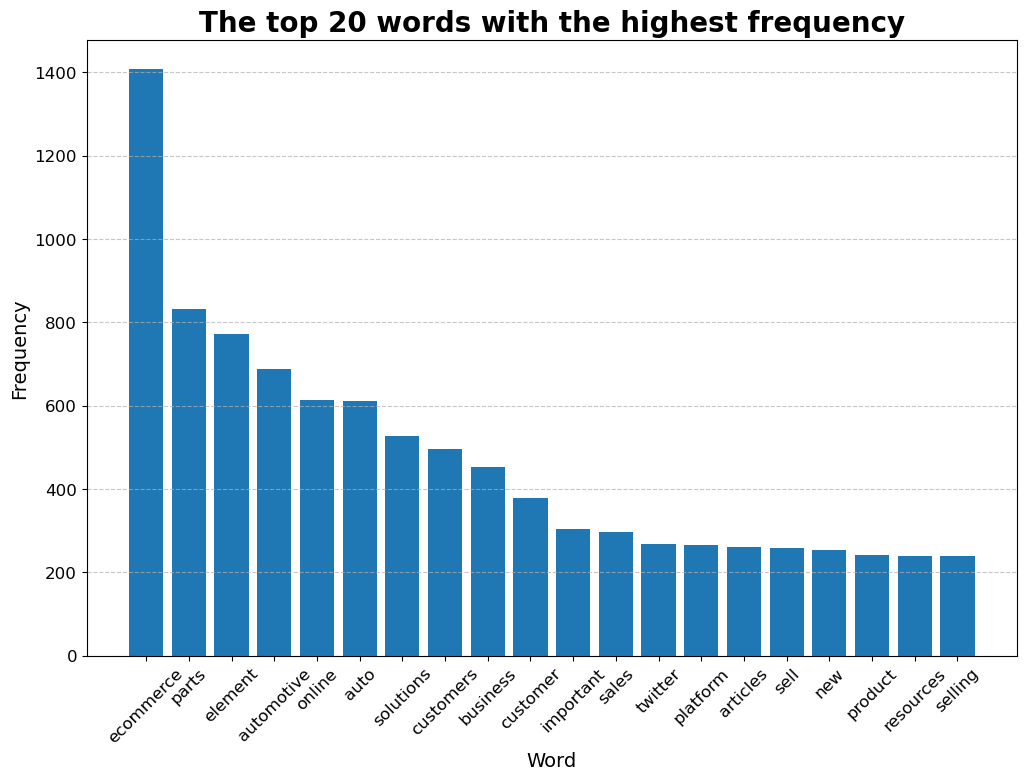

In [141]:
words = top_keywords['word'].head(20)
frequencies = top_keywords['frequency'].head(20)

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(words, frequencies, color='#1f77b4')
ax.set_title('The top 20 words with the highest frequency', fontsize=20, fontweight='bold')
ax.set_xlabel('Word', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.show()

## Word Cloud

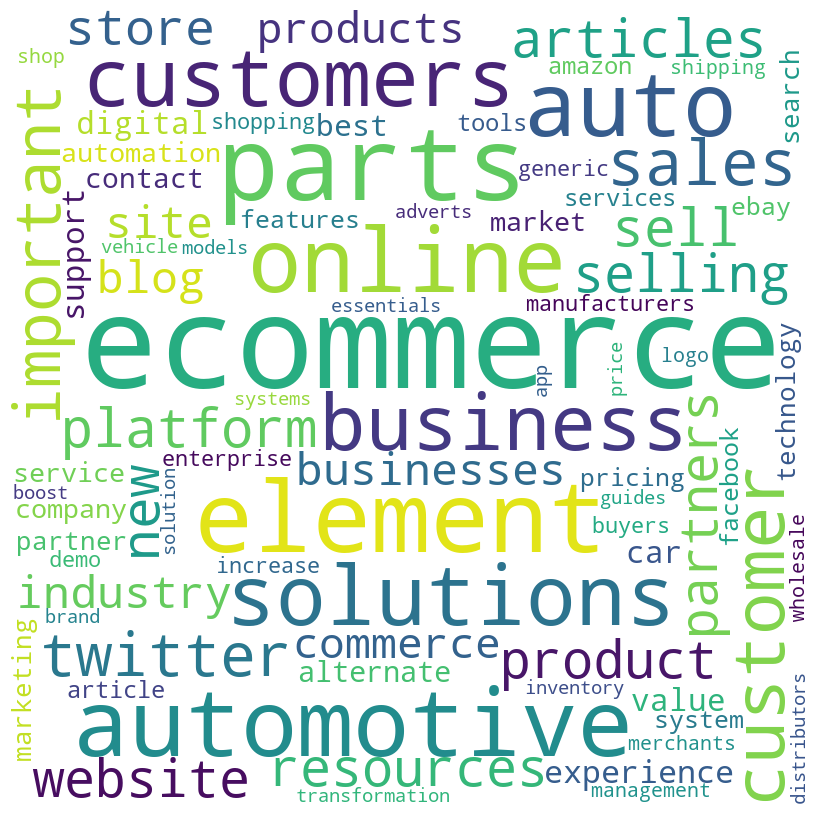

In [148]:
def create_word_cloud(dataframe):
    word_cloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
    word_frequency_dict = dict(zip(dataframe['word'], dataframe['frequency']))
    word_cloud.generate_from_frequencies(frequencies=word_frequency_dict)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

create_word_cloud(top_keywords)

## Swarm Plot for Other sites

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4328\1865663987.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="word", y="frequency", data=subset, size=10, palette="muted", ax=ax)


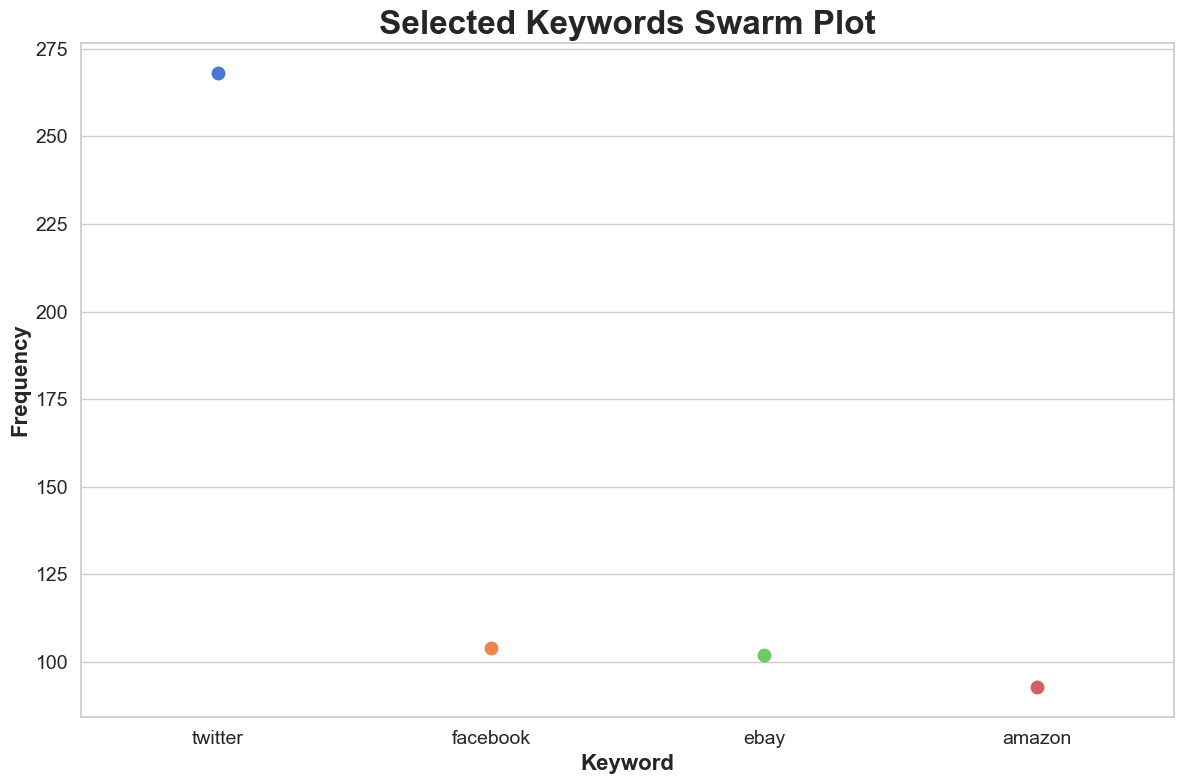

In [154]:
# We select the sub-dataset containing the related words
selected_words = ["twitter", "facebook", "ebay", "amazon"]
subset = top_keywords[top_keywords["word"].isin(selected_words)]

# We draw a swarm plot

fig, ax = plt.subplots(figsize=(12,8))
sns.swarmplot(x="word", y="frequency", data=subset, size=10, palette="muted", ax=ax)

ax.set_title("Selected Keywords Swarm Plot", fontsize=24, fontweight="bold")
ax.set_xlabel("Keyword", fontsize=16, fontweight="bold")
ax.set_ylabel("Frequency", fontsize=16, fontweight="bold")
ax.tick_params(axis="both", labelsize=14)

plt.tight_layout()

plt.show()